In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans

In [3]:
weather_data = pd.read_csv('v2024_04_16.txt', sep="\t", header=0)
weather_data2 = pd.read_csv('atm2024_02_16.txt', sep="\t", header=0)


In [4]:
weather_data

,pnum,y,mn,d,h,m,s,mks,d1,d2,...,d247,d248,d249,d250,d251,d252,d253,d254,d255,d256
0,78,2024,2,16,0,2,26,46916,12,-8,...,-18,3,-2,35,-3,-69,-76,-106,-181,-208
1,78,2024,2,16,0,2,26,155260,43,63,...,66,102,232,352,329,241,198,166,159,174
2,78,2024,2,16,0,2,31,753968,62,48,...,47,4,-41,-59,-56,-6,79,135,165,164
3,78,2024,2,16,0,2,52,28838,341,412,...,-41,7,-9,-79,-144,-275,-271,-20,385,841
4,78,2024,2,16,0,2,52,117703,-29,37,...,710,779,737,626,440,261,219,265,291,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,78,2024,2,16,23,33,25,792093,-12,12,...,246,291,323,328,328,341,333,323,318,295
1281,78,2024,2,16,23,34,12,413640,-29,-20,...,-141,-322,-480,-569,-588,-551,-470,-385,-337,-353
1282,78,2024,2,16,23,36,61,297781,-51,-76,...,3,13,34,45,38,37,50,38,31,36
1283,78,2024,2,16,23,43,54,946463,0,-21,...,170,187,218,228,213,240,250,202,163,131


In [5]:
weather_data2.loc[:, 'd145' : ].head(10)

,d145,d146,d147,d148,d149,d150,d151,d152,d153,d154,d155,d156,d157,d158,d159,d160
0,3,2,1,0,-1,-2,0,0,0,0,0,0,0,0,0,0
1,7,7,7,7,7,6,0,0,0,0,0,0,0,0,0,0
2,5,4,4,3,3,2,0,0,0,0,0,0,0,0,0,0
3,0,1,1,2,3,4,0,0,0,0,0,0,0,0,0,0
4,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,-1,0,0,0,0,0,0,0,0,0,0
6,-3,-3,-3,-3,-3,-3,0,0,0,0,0,0,0,0,0,0
7,-4,-3,-2,-1,1,2,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,5,5,4,4,4,4,0,0,0,0,0,0,0,0,0,0


In [7]:
weather_data2.loc[:, 'day' : 'sec']

,day,mon,year,hou,min,sec
0,16,2,2024,0,0,4
1,16,2,2024,0,0,4
2,16,2,2024,0,0,10
3,16,2,2024,0,0,11
4,16,2,2024,0,0,19
...,...,...,...,...,...,...
20066,16,2,2024,23,58,22
20067,16,2,2024,23,58,24
20068,16,2,2024,23,58,57
20069,16,2,2024,23,59,6


In [24]:
weather_data['year'].sort_values

<bound method Series.sort_values of 0        16
1        16
2        16
3        16
4        16
         ..
20066    16
20067    16
20068    16
20069    16
20070    16
Name: day, Length: 20071, dtype: int64>

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Ваши данные, представленные векторами из 256 чисел
# Замените X на свои данные

X = weather_data.loc[:, 'd1' :]
# Создаем экземпляр модели KMeans с указанием количества кластеров
n_clusters = 10  # Задайте желаемое количество кластеров
kmeans = KMeans(n_clusters=n_clusters)

# Обучаем модель на данных
kmeans.fit(X)

# Получаем метки кластеров для каждого объекта
labels = kmeans.labels_
# Получаем координаты центров кластеров
centroids = kmeans.cluster_centers_

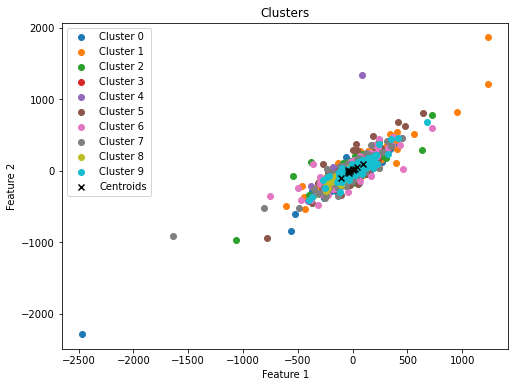

In [9]:
import matplotlib.pyplot as plt

# Визуализация кластеров
plt.figure(figsize=(8, 6))

# Разделение меток кластеров для каждого кластера
for cluster_label in range(n_clusters):
    cluster_points = X[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_label}')

# Визуализация центров кластеров
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black', label='Centroids')

plt.title('Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [10]:
weather_data

,pnum,y,mn,d,h,m,s,mks,d1,d2,...,d247,d248,d249,d250,d251,d252,d253,d254,d255,d256
0,78,2024,2,16,0,2,26,46916,12,-8,...,-18,3,-2,35,-3,-69,-76,-106,-181,-208
1,78,2024,2,16,0,2,26,155260,43,63,...,66,102,232,352,329,241,198,166,159,174
2,78,2024,2,16,0,2,31,753968,62,48,...,47,4,-41,-59,-56,-6,79,135,165,164
3,78,2024,2,16,0,2,52,28838,341,412,...,-41,7,-9,-79,-144,-275,-271,-20,385,841
4,78,2024,2,16,0,2,52,117703,-29,37,...,710,779,737,626,440,261,219,265,291,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,78,2024,2,16,23,33,25,792093,-12,12,...,246,291,323,328,328,341,333,323,318,295
1281,78,2024,2,16,23,34,12,413640,-29,-20,...,-141,-322,-480,-569,-588,-551,-470,-385,-337,-353
1282,78,2024,2,16,23,36,61,297781,-51,-76,...,3,13,34,45,38,37,50,38,31,36
1283,78,2024,2,16,23,43,54,946463,0,-21,...,170,187,218,228,213,240,250,202,163,131


In [11]:
corr =  weather_data.loc[:, 'd1' :]
corr_matrix = corr.corr()
mean_corr = corr_matrix.mean().mean()
std_corr = corr_matrix.values.std()

corr_matrix

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d247,d248,d249,d250,d251,d252,d253,d254,d255,d256
d1,1.000000,0.877696,0.604207,0.318151,0.115477,-0.014577,-0.023510,0.032357,0.084518,0.048057,...,-0.067381,-0.043133,-0.001455,0.061334,0.136406,0.202204,0.259602,0.272273,0.199692,0.095777
d2,0.877696,1.000000,0.878191,0.607483,0.347276,0.093493,-0.042528,-0.048654,0.024984,0.064183,...,-0.055791,-0.011173,0.021719,0.057878,0.099015,0.139794,0.192646,0.243474,0.222969,0.146518
d3,0.604207,0.878191,1.000000,0.888036,0.639641,0.277023,0.003218,-0.108347,-0.065793,0.046938,...,-0.079448,-0.020915,0.020325,0.049020,0.072725,0.096774,0.134922,0.189986,0.214350,0.193319
d4,0.318151,0.607483,0.888036,1.000000,0.881520,0.512959,0.157111,-0.047171,-0.093850,0.000118,...,-0.111968,-0.051110,0.007467,0.048520,0.064697,0.065909,0.080746,0.118774,0.155948,0.179418
d5,0.115477,0.347276,0.639641,0.881520,1.000000,0.825030,0.493831,0.210946,0.022376,-0.031560,...,-0.111740,-0.044674,0.032769,0.087427,0.098867,0.074950,0.051558,0.057103,0.077478,0.099646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d252,0.202204,0.139794,0.096774,0.065909,0.074950,0.089194,0.059022,-0.017988,-0.118196,-0.191628,...,0.053474,0.237309,0.502993,0.747499,0.930038,1.000000,0.925222,0.693144,0.372178,0.083447
d253,0.259602,0.192646,0.134922,0.080746,0.051558,0.043539,0.032112,-0.008464,-0.078180,-0.141794,...,0.044519,0.129559,0.305261,0.523212,0.748562,0.925222,1.000000,0.898979,0.631567,0.319583
d254,0.272273,0.243474,0.189986,0.118774,0.057103,0.019431,0.009227,0.000880,-0.026334,-0.068383,...,0.053401,0.070451,0.136223,0.274745,0.472980,0.693144,0.898979,1.000000,0.891281,0.638703
d255,0.199692,0.222969,0.214350,0.155948,0.077478,0.012361,-0.019907,-0.022213,-0.006003,-0.001522,...,0.033723,0.028502,0.017781,0.056374,0.177530,0.372178,0.631567,0.891281,1.000000,0.904191


In [12]:
print(mean_corr, std_corr)
matrix = corr_matrix.mask((corr_matrix < mean_corr + 2 * std_corr) & (corr_matrix > mean_corr - 2 * std_corr), 0)
matrix

0.004413427500164834 0.20471369452120744


,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d247,d248,d249,d250,d251,d252,d253,d254,d255,d256
d1,1.000000,0.877696,0.604207,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d2,0.877696,1.000000,0.878191,0.607483,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d3,0.604207,0.878191,1.000000,0.888036,0.639641,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d4,0.000000,0.607483,0.888036,1.000000,0.881520,0.512959,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
d5,0.000000,0.000000,0.639641,0.881520,1.000000,0.825030,0.493831,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.502993,0.747499,0.930038,1.000000,0.925222,0.693144,0.000000,0.000000
d253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.523212,0.748562,0.925222,1.000000,0.898979,0.631567,0.000000
d254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.472980,0.693144,0.898979,1.000000,0.891281,0.638703
d255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.631567,0.891281,1.000000,0.904191


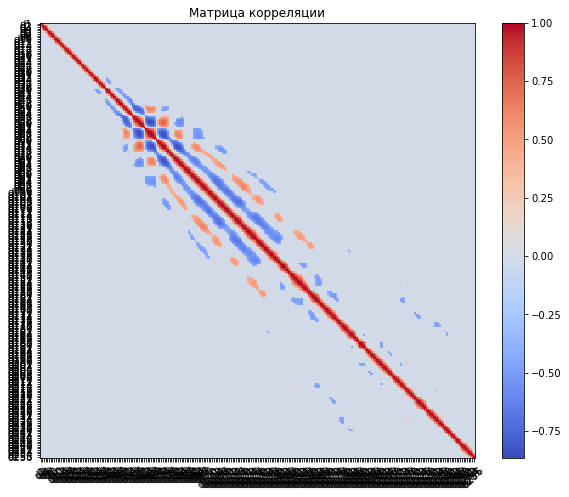

In [13]:
plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Матрица корреляции')
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=45)
plt.yticks(range(len(matrix.columns)), matrix.columns)
plt.show()

In [14]:
correlated_columns_matrix = pd.DataFrame(columns=['column1', 'column2', 'correlation'])

# Перебираем верхний треугольник матрицы корреляции (без диагонали)
for i in range(len(matrix.columns)):
    for j in range(i+1, len(matrix.columns)):
        column1 = matrix.columns[i]
        column2 = matrix.columns[j]
        correlation = matrix.iloc[i, j]
        
        # Если корреляция выше определенного порога, добавляем пару столбцов и их корреляцию в новую матрицу
        if abs(correlation) > 0.5:  # Например, порог корреляции равен 0.5
            correlated_columns_matrix = correlated_columns_matrix.append({'column1': column1, 'column2': column2, 'correlation': correlation}, ignore_index=True)

correlated_columns_matrix

,column1,column2,correlation
0,d1,d2,0.877696
1,d1,d3,0.604207
2,d2,d3,0.878191
3,d2,d4,0.607483
4,d3,d4,0.888036
...,...,...,...
1202,d253,d254,0.898979
1203,d253,d255,0.631567
1204,d254,d255,0.891281
1205,d254,d256,0.638703


In [17]:
G = nx.Graph()

for _, row in correlated_columns_matrix.iterrows():
    G.add_edge(row['column1'], row['column2'])

communities = list(nx.algorithms.community.greedy_modularity_communities(G))

for i, comm in enumerate(communities):
    print(f"Community {i + 1}: {comm}")


Community 1: frozenset({'d102', 'd129', 'd103', 'd113', 'd159', 'd115', 'd106', 'd132', 'd95', 'd134', 'd118', 'd128', 'd150', 'd141', 'd136', 'd139', 'd100', 'd137', 'd108', 'd133', 'd125', 'd98', 'd104', 'd135', 'd123', 'd119', 'd149', 'd131', 'd130', 'd111', 'd114', 'd140', 'd142', 'd124', 'd158', 'd126', 'd154', 'd109', 'd145', 'd157', 'd151', 'd138', 'd116', 'd155', 'd146', 'd107', 'd96', 'd120', 'd121', 'd97', 'd144', 'd156', 'd117', 'd112', 'd153', 'd143', 'd101', 'd105', 'd122', 'd127', 'd148', 'd99', 'd147', 'd152', 'd110'})
Community 2: frozenset({'d41', 'd53', 'd60', 'd82', 'd78', 'd66', 'd61', 'd70', 'd94', 'd50', 'd88', 'd49', 'd71', 'd84', 'd52', 'd56', 'd87', 'd74', 'd43', 'd39', 'd72', 'd79', 'd42', 'd54', 'd40', 'd51', 'd46', 'd62', 'd89', 'd80', 'd57', 'd91', 'd86', 'd58', 'd68', 'd93', 'd83', 'd59', 'd77', 'd76', 'd69', 'd63', 'd85', 'd90', 'd73', 'd64', 'd44', 'd55', 'd75', 'd45', 'd47', 'd81', 'd92', 'd48', 'd67', 'd65'})
Community 3: frozenset({'d229', 'd232', 'd2

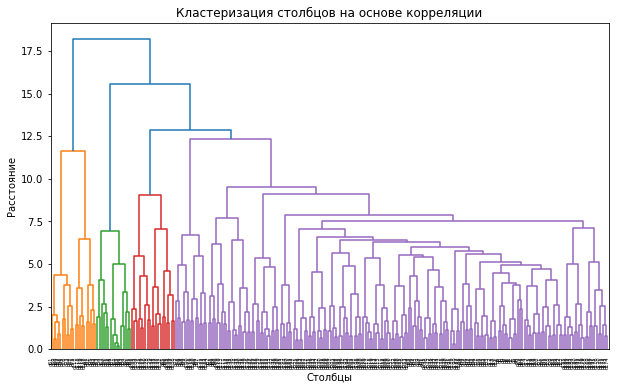

In [38]:
clustered_columns = hierarchy.linkage(matrix, method='ward')

# Визуализируем результаты кластеризации
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(clustered_columns, labels=matrix.columns)
plt.title('Кластеризация столбцов на основе корреляции')
plt.xlabel('Столбцы')
plt.ylabel('Расстояние')
plt.xticks(rotation=90)
plt.show()

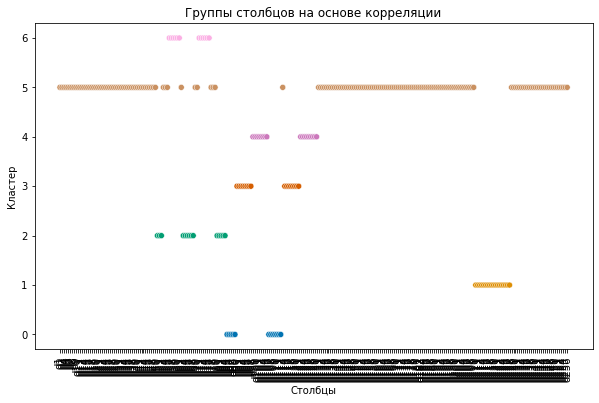

In [20]:
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(matrix)

# Создаем DataFrame для визуализации
df_vis = pd.DataFrame({'Column': matrix.columns, 'Cluster': cluster_labels})

# Визуализируем результаты
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vis, x='Column', y='Cluster', hue='Cluster', palette='colorblind', legend=False)
plt.title('Группы столбцов на основе корреляции')
plt.xlabel('Столбцы')
plt.ylabel('Кластер')
plt.xticks(rotation=90)
plt.show()

In [45]:
X = weather_data.loc[:, 'd1' :]
X

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d247,d248,d249,d250,d251,d252,d253,d254,d255,d256
0,12,-8,-36,-52,-36,10,70,78,32,-39,...,-18,3,-2,35,-3,-69,-76,-106,-181,-208
1,43,63,102,153,162,99,12,-85,-171,-185,...,66,102,232,352,329,241,198,166,159,174
2,62,48,49,49,58,59,60,97,126,111,...,47,4,-41,-59,-56,-6,79,135,165,164
3,341,412,426,453,242,-60,-160,-166,-158,-88,...,-41,7,-9,-79,-144,-275,-271,-20,385,841
4,-29,37,71,63,3,-51,-70,-55,-1,64,...,710,779,737,626,440,261,219,265,291,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,-12,12,27,0,-33,-41,-63,-78,-62,-23,...,246,291,323,328,328,341,333,323,318,295
1281,-29,-20,-18,-6,15,18,-3,-13,-17,-29,...,-141,-322,-480,-569,-588,-551,-470,-385,-337,-353
1282,-51,-76,-73,-67,-81,-89,-59,-29,-5,10,...,3,13,34,45,38,37,50,38,31,36
1283,0,-21,-10,3,18,42,46,10,-12,9,...,170,187,218,228,213,240,250,202,163,131


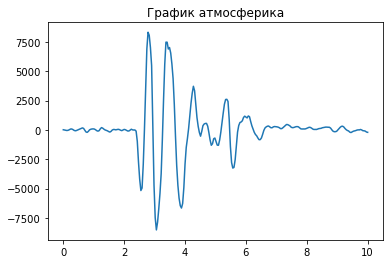

In [19]:
y = X.iloc[0].values
x = np.linspace(0, 10, 256)  

plt.plot(x, y)
plt.title('График атмосферика')
plt.show()

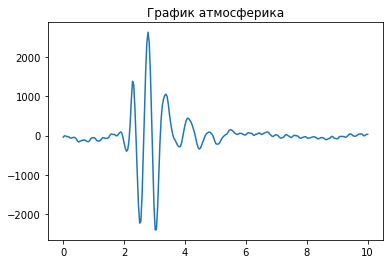

In [18]:
y = X.iloc[24].values
x = np.linspace(0, 10, 256)

plt.plot(x, y)
plt.title('График атмосферика')
plt.show()